In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem statement : To develop models and algorithms to identify and filter spam emails

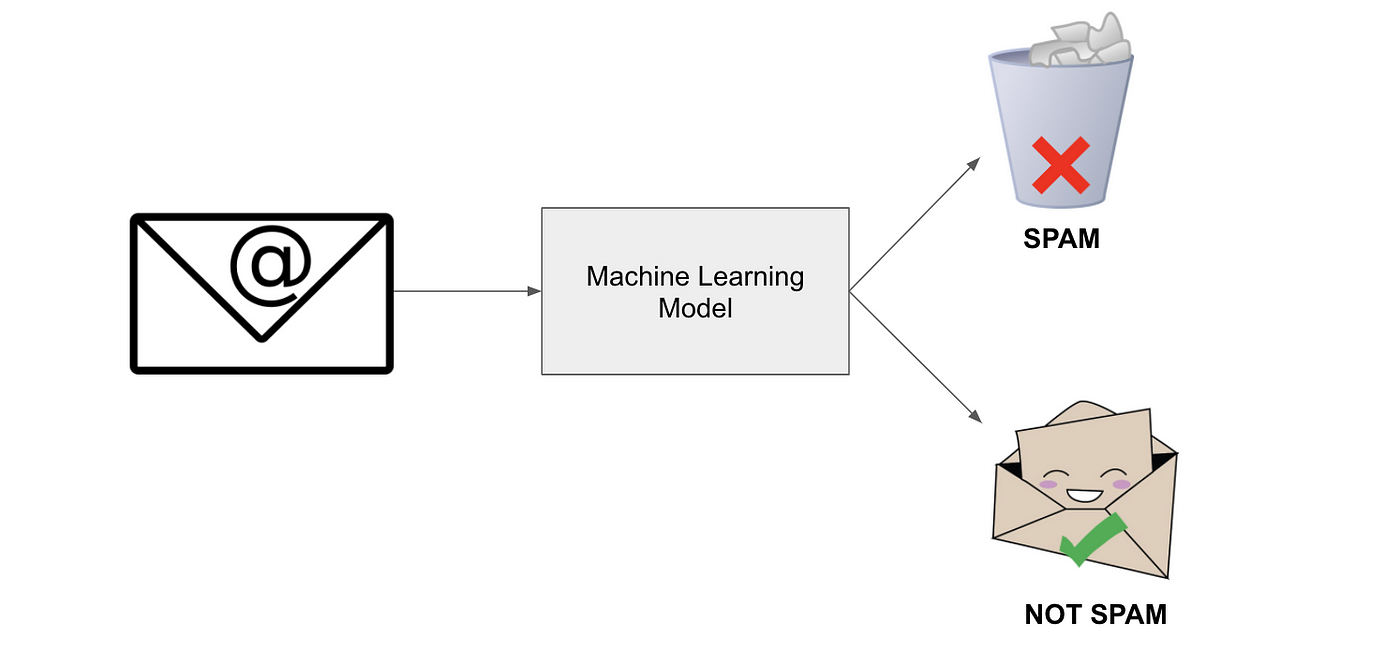

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1790,ham,Am not working but am up to eyes in philosophy...,NaN,NaN,NaN
1739,ham,U guys never invite me anywhere :(,NaN,NaN,NaN
3652,ham,It has issues right now. Ill fix for her by to...,NaN,NaN,NaN
3621,ham,Goin to workout lor... Muz lose e fats...,NaN,NaN,NaN
2211,ham,Just gettin a bit arty with my collages at the...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. Data Cleaning

Evaluation
Improvement
Website

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
5440,ham,Thank you. do you generally date the brothas?
2867,ham,"Aight, tomorrow around &lt;#&gt; it is"
1293,ham,Happy birthday... May all ur dreams come true...
1993,ham,Eh den sat u book e kb liao huh...
276,ham,Tell rob to mack his gf in the theater


In [8]:
df.rename(columns={'v1': 'target','v2':'text'}, inplace=True)

In [9]:
df.sample(5)

,target,text
245,ham,Too late. I said i have the website. I didn't ...
1421,ham,Do you work all this week ?
3349,ham,Sorry i cant take your call right now. It so h...
61,ham,Ha ha ha good joke. Girls are situation seekers.
3580,ham,Ard 4 lor...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

,0
target,0
text,0


In [14]:
df.duplicated().sum()

409

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5163, 2)

#2. EDA

In [17]:
df['target'].value_counts()

,count
target,
0,4516
1,647


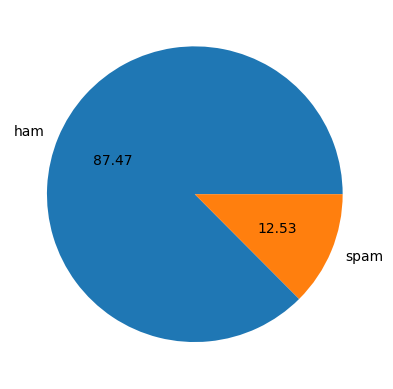

In [18]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
# Data is imbalanced

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_character'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# ham
df[df['target'] == 0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# spam
df[df['target'] == 1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

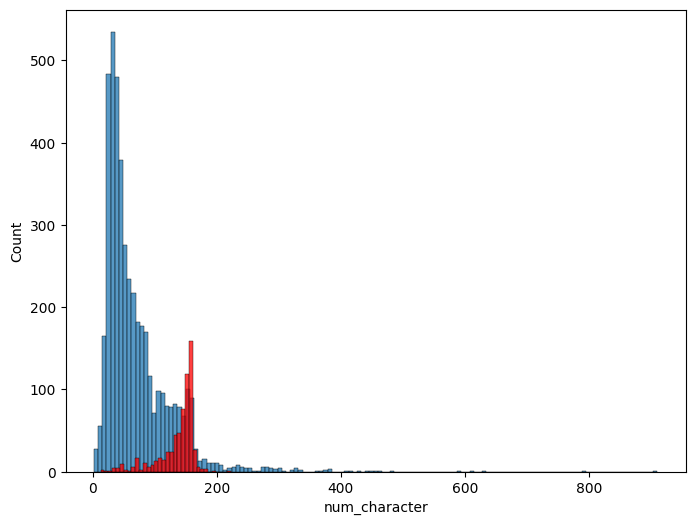

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

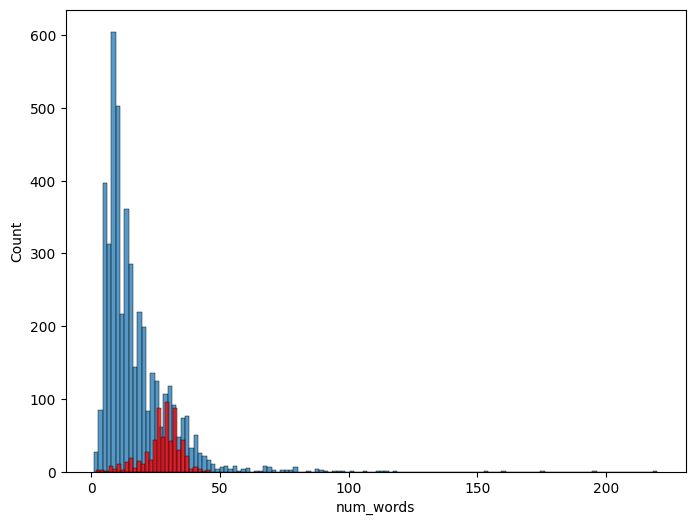

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

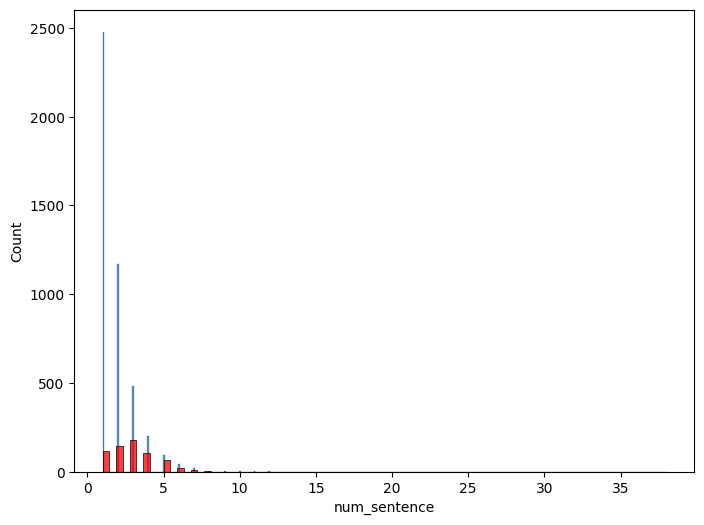

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

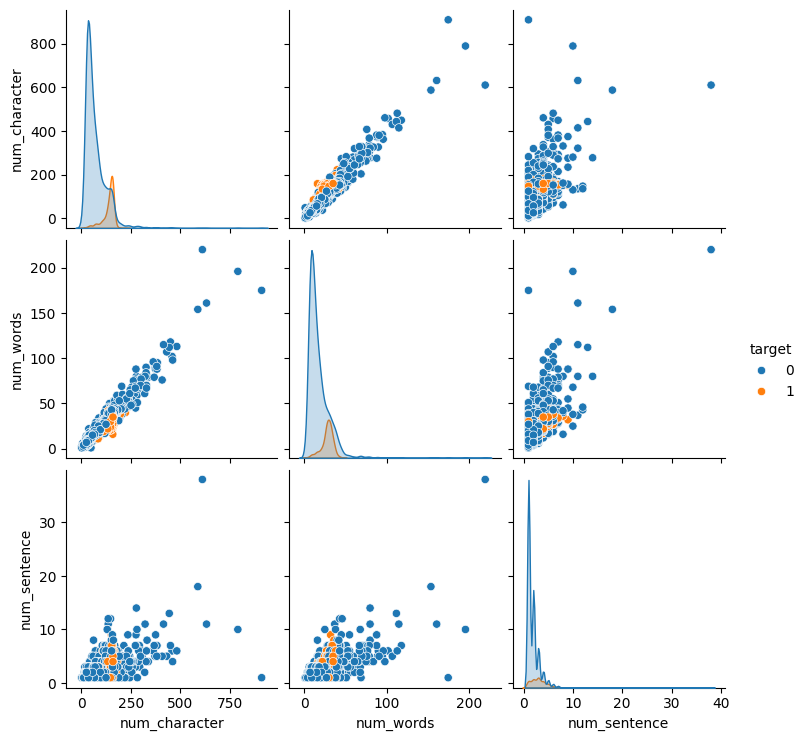

In [35]:
sns.pairplot(df, hue='target')

<Axes: >

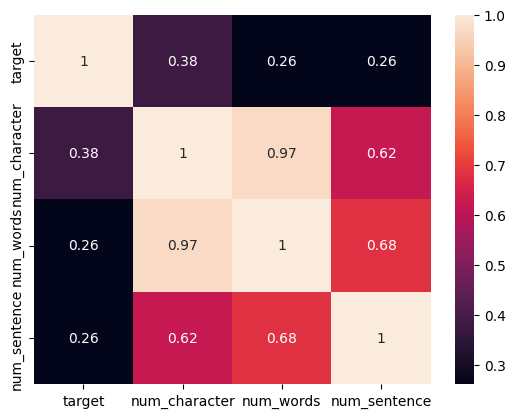

In [36]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# 3. Text Preprocessing

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))



  return " ".join(y)

In [41]:
transform_text('Hi how Are you Ayush')

'hi ayush'

In [42]:
df['transform_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_character,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [45]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))


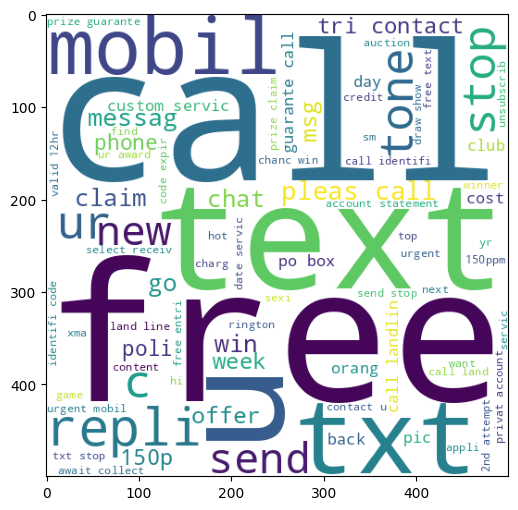

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))


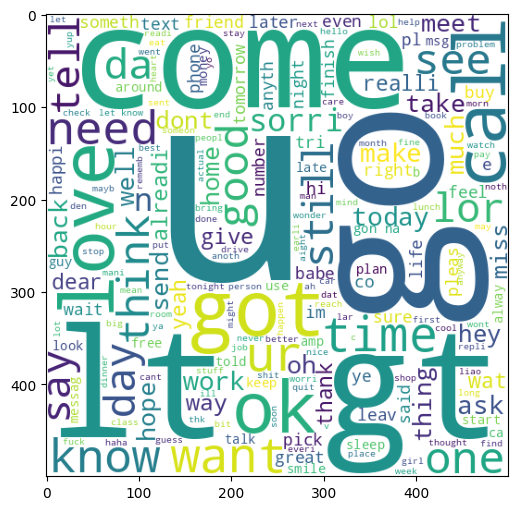

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [52]:
len(spam_corpus)

9861

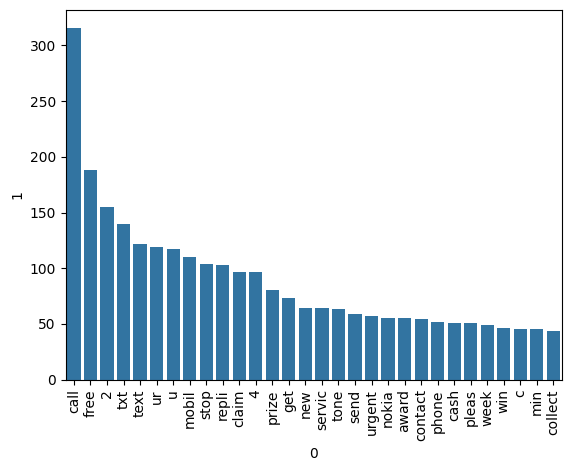

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [55]:
len(ham_corpus)

35306

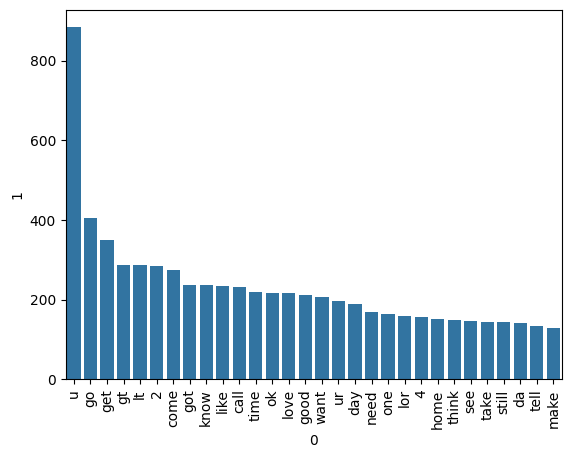

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


# 4. Model building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [58]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [59]:
X.shape

(5163, 6678)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [63]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score


gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [64]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8635043562439496
[[786 126]
 [ 15 106]]
0.45689655172413796


In [65]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593417231364957
[[912   0]
 [ 42  79]]
1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9690222652468539
[[908   4]
 [ 28  93]]
0.9587628865979382


In [67]:
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc= SVC(kernel= 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier ()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier (max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [69]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC':bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [70]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [71]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748305905130688, 0.9702970297029703)

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9748305905130688
Precision -  0.9702970297029703
For  KN
Accuracy -  0.9080348499515973
Precision -  1.0
For  NB
Accuracy -  0.9593417231364957
Precision -  1.0
For  DT
Accuracy -  0.9341723136495643
Precision -  0.8192771084337349
For  LR
Accuracy -  0.952565343659245
Precision -  0.9390243902439024
For  RF
Accuracy -  0.9670861568247822
Precision -  0.978021978021978


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9545014520813165
Precision -  0.8854166666666666
For  BgC
Accuracy -  0.9583736689254598
Precision -  0.8421052631578947
For  ETC
Accuracy -  0.9738625363020329
Precision -  0.9895833333333334
For  GBDT
Accuracy -  0.9506292352371732
Precision -  0.926829268292683
For  xgb
Accuracy -  0.9661181026137464
Precision -  0.9134615384615384


In [73]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores,  'Precision':precision_scores}).sort_values("Precision", ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908035,1.000000
2,NB,0.959342,1.000000
8,ETC,0.973863,0.989583
5,RF,0.967086,0.978022
0,SVC,0.974831,0.970297
4,LR,0.952565,0.939024
9,GBDT,0.950629,0.926829
10,xgb,0.966118,0.913462
6,AdaBoost,0.954501,0.885417
7,BgC,0.958374,0.842105


# Improve the model

In [75]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=6000)

In [76]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [77]:
X.shape

(5163, 6000)

In [78]:
y = df['target'].values

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [81]:
svc= SVC(kernel= 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier ()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier (max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC':bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [83]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [84]:
accuracy_scores_3000 = []
precision_scores_3000 = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores_3000.append(current_accuracy)
  precision_scores_3000.append(current_precision)


For  SVC
Accuracy -  0.9757986447241046
Precision -  0.9705882352941176
For  KN
Accuracy -  0.9090029041626331
Precision -  1.0
For  NB
Accuracy -  0.9622458857696031
Precision -  1.0
For  DT
Accuracy -  0.9370764762826719
Precision -  0.8333333333333334
For  LR
Accuracy -  0.952565343659245
Precision -  0.9285714285714286
For  RF
Accuracy -  0.9738625363020329
Precision -  0.9895833333333334


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9506292352371732
Precision -  0.8723404255319149
For  BgC
Accuracy -  0.9603097773475314
Precision -  0.8571428571428571
For  ETC
Accuracy -  0.972894482090997
Precision -  0.9603960396039604
For  GBDT
Accuracy -  0.9535333978702807
Precision -  0.9101123595505618
For  xgb
Accuracy -  0.9612778315585673
Precision -  0.900990099009901


In [85]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_3000':accuracy_scores_3000,  'Precision_3000':precision_scores_3000}).sort_values("Precision_3000", ascending=False)

In [86]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
0,KN,0.908035,1.000000,0.909003,1.000000
1,NB,0.959342,1.000000,0.962246,1.000000
2,ETC,0.973863,0.989583,0.972894,0.960396
3,RF,0.967086,0.978022,0.973863,0.989583
4,SVC,0.974831,0.970297,0.975799,0.970588
5,LR,0.952565,0.939024,0.952565,0.928571
6,GBDT,0.950629,0.926829,0.953533,0.910112
7,xgb,0.966118,0.913462,0.961278,0.900990
8,AdaBoost,0.954501,0.885417,0.950629,0.872340
9,BgC,0.958374,0.842105,0.960310,0.857143


# Improve 2

In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5800)


In [88]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [90]:
y = df['target'].values

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [92]:
svc= SVC(kernel= 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier ()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier (max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [93]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC':bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [94]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [95]:
accuracy_scores_scaler = []
precision_scores_scaler = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores_scaler.append(current_accuracy)
  precision_scores_scaler.append(current_precision)

For  SVC
Accuracy -  0.9709583736689255
Precision -  0.9504950495049505
For  KN
Accuracy -  0.9060987415295256
Precision -  1.0
For  NB
Accuracy -  0.978702807357212
Precision -  0.9380530973451328
For  DT
Accuracy -  0.936108422071636
Precision -  0.8313253012048193
For  LR
Accuracy -  0.9603097773475314
Precision -  0.9651162790697675
For  RF
Accuracy -  0.9699903194578896
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9506292352371732
Precision -  0.8645833333333334
For  BgC
Accuracy -  0.9593417231364957
Precision -  0.8495575221238938
For  ETC
Accuracy -  0.9777347531461762
Precision -  0.99
For  GBDT
Accuracy -  0.9515972894482091
Precision -  0.9080459770114943
For  xgb
Accuracy -  0.9622458857696031
Precision -  0.8942307692307693


In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores_scaler,'Precision_scaling':precision_scores_scaler}).sort_values('Precision_scaling',ascending=False)


In [97]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [98]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [99]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.908035,1.000000,0.906099,1.000000,0.906099,1.000000
1,NB,0.959342,1.000000,0.978703,0.938053,0.978703,0.938053
2,ETC,0.973863,0.989583,0.977735,0.990000,0.977735,0.990000
3,RF,0.967086,0.978022,0.969990,1.000000,0.969990,1.000000
4,SVC,0.974831,0.970297,0.970958,0.950495,0.970958,0.950495
5,LR,0.952565,0.939024,0.960310,0.965116,0.960310,0.965116
6,GBDT,0.950629,0.926829,0.951597,0.908046,0.951597,0.908046
7,xgb,0.966118,0.913462,0.962246,0.894231,0.962246,0.894231
8,AdaBoost,0.954501,0.885417,0.950629,0.864583,0.950629,0.864583
9,BgC,0.958374,0.842105,0.959342,0.849558,0.959342,0.849558


In [102]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))